# Laboratorio III

## Imports

In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Parte 1

### Apartado (a)

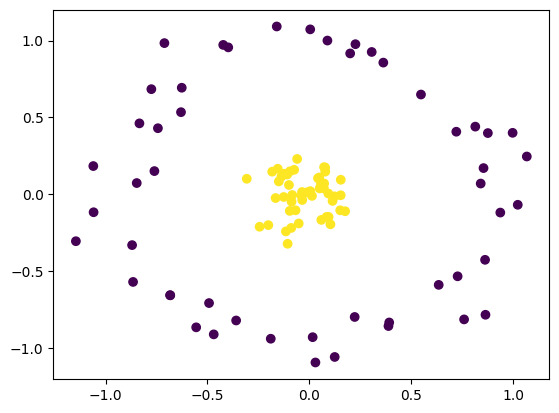

In [15]:
# abrir csv's usando csv.reader
with open('y_laboratorio_AAA.csv') as csvfile:
    y = np.array(list(csv.reader(csvfile))).astype(int)
    
with open('X_laboratorio_AAA.csv') as csvfile:
    X = np.array(list(csv.reader(csvfile))).astype(float)

# de momento solo consideramos dos features
X = X[:,0:2]

plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis')
plt.show()

### Apartados (b), (c) y (d)

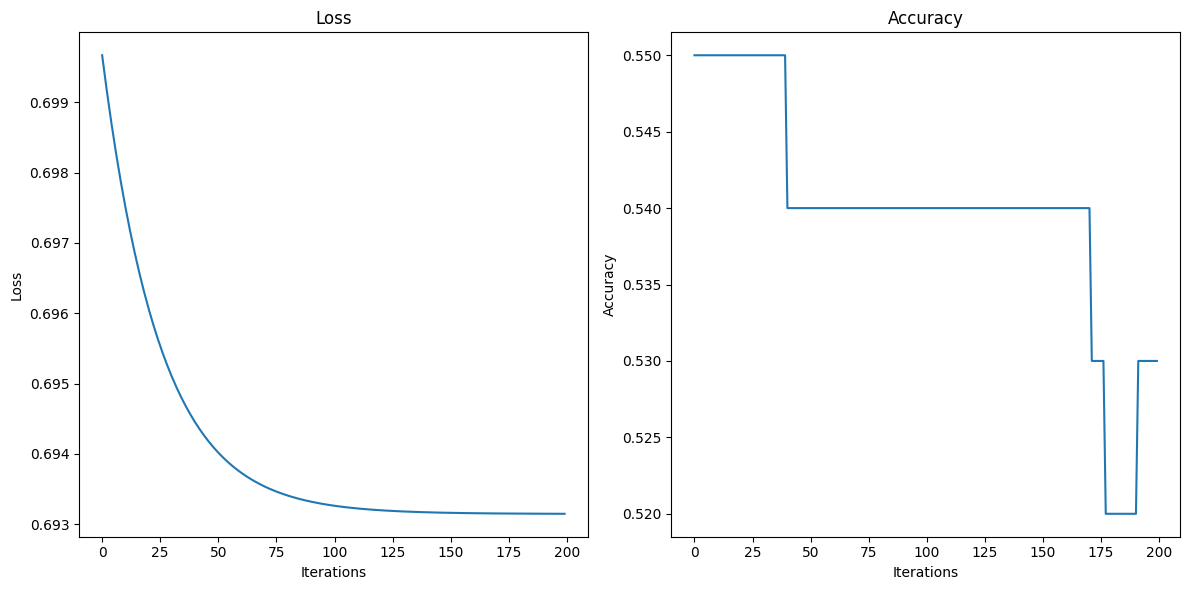

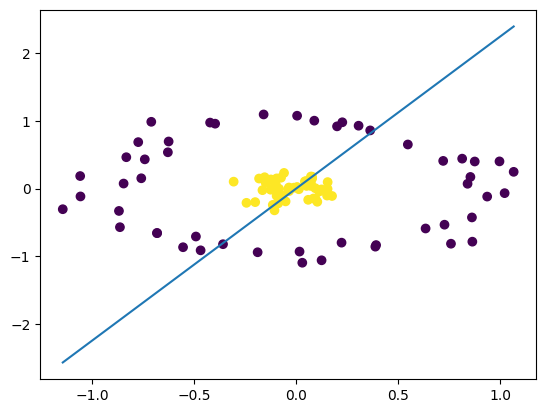

In [16]:
# Gradient Descent
lambda_reg = 1.0
n, m = X.shape
learning_rate = 0.01
iterations = 200

w = np.random.uniform(-0.5, 0.5, m)

losses1 = []
accuracies1 = []

for _ in range(iterations):  
    gradient = np.mean((-y * X) / (1 + np.exp(-np.dot(y.T, np.dot(X, w))))) + 2*lambda_reg*w
    w -= learning_rate * gradient

    log_loss = np.mean(np.log(1 + np.exp(-y * np.dot(X, w))))
    losses1.append(log_loss)
    predictions = np.sign(np.dot(X, w))
    accuracy = np.mean(predictions == y.flatten())
    accuracies1.append(accuracy)

    
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfica de Loss
ax[0].plot(range(iterations), losses1)
ax[0].set_title('Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

# Gráfica de Accuracy
ax[1].plot(range(iterations), accuracies1)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()

# w es perpendicular a la recta que separa las dos clases. La recta que separa ambas clases es la f(X) = w*X
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis') # datos originales

# recordemos que sing(w*x) es la función de decisión, por lo que la recta que separa las dos clases es w*X = 0
# para graficar la recta, despejamos x_2 de la ecuación w*X = 0, obteniendo x_2 = -w_1*x_1/w_2
# cojo dos puntos para graficar la recta
x1 = np.array([min(X[:,0]), max(X[:,0])]) # cojo dos x_1 cualesquiera, en este caso el minimo y el máximo para que la recta este en el rango de los datos
x2 = -w[0] * x1 / w[1] # cálculo su correspondiente x_2
plt.plot(x1, x2)
plt.show()

## Parte 2

### Apartados (a) y (b)

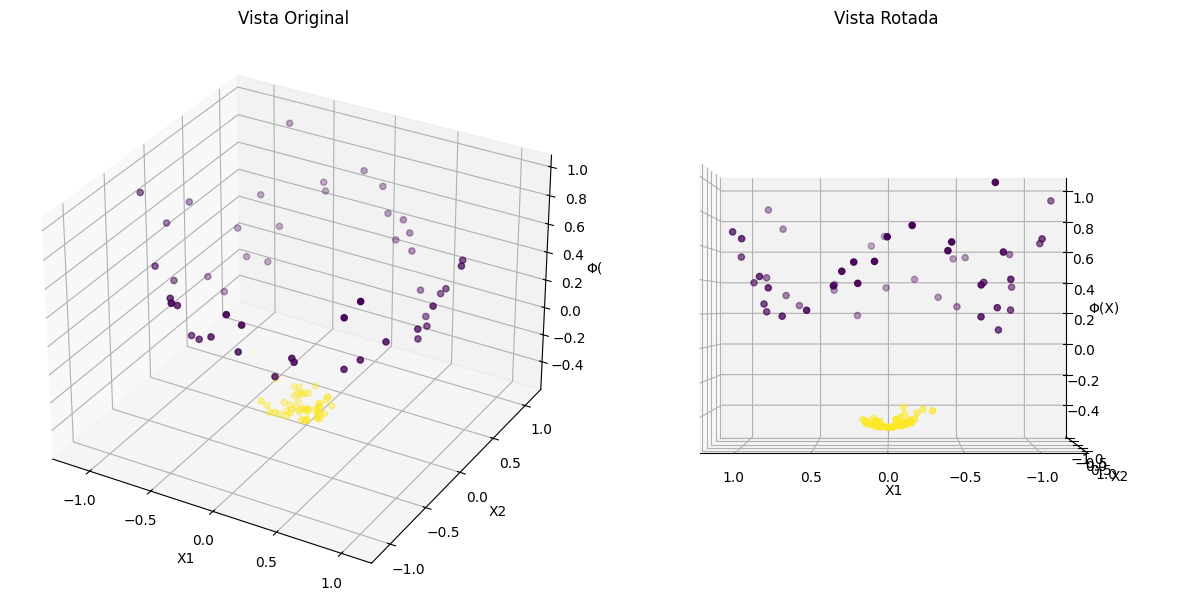

In [17]:
with open('y_laboratorio_AAA.csv') as csvfile:
    y = np.array(list(csv.reader(csvfile))).astype(int)
    
with open('X_laboratorio_AAA.csv') as csvfile:
    X = np.array(list(csv.reader(csvfile))).astype(float)

# Solo consideramos dos features
X = X[:, 0:2]

def transform(X):
    # φ(x1, x2) = (x1, x2, x_1² + x_2² − 1/2)
    return np.array([X[:, 0], X[:, 1], X[:, 0]**2 + X[:, 1]**2 - 0.5])

# Transformar los datos
X = transform(X).T

# Crear la figura
fig = plt.figure(figsize=(12, 6))

# Primer gráfico (vista original)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax1.set_title('Vista Original')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Φ(X)')

# Segundo gráfico (vista rotada)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax2.view_init(elev=0, azim=90)  # Cambia los ángulos de elevación y azimut
ax2.set_title('Vista Rotada')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Φ(X)')

# Mostrar la figura
plt.tight_layout()
plt.show()


### Apartados (c) y (d)

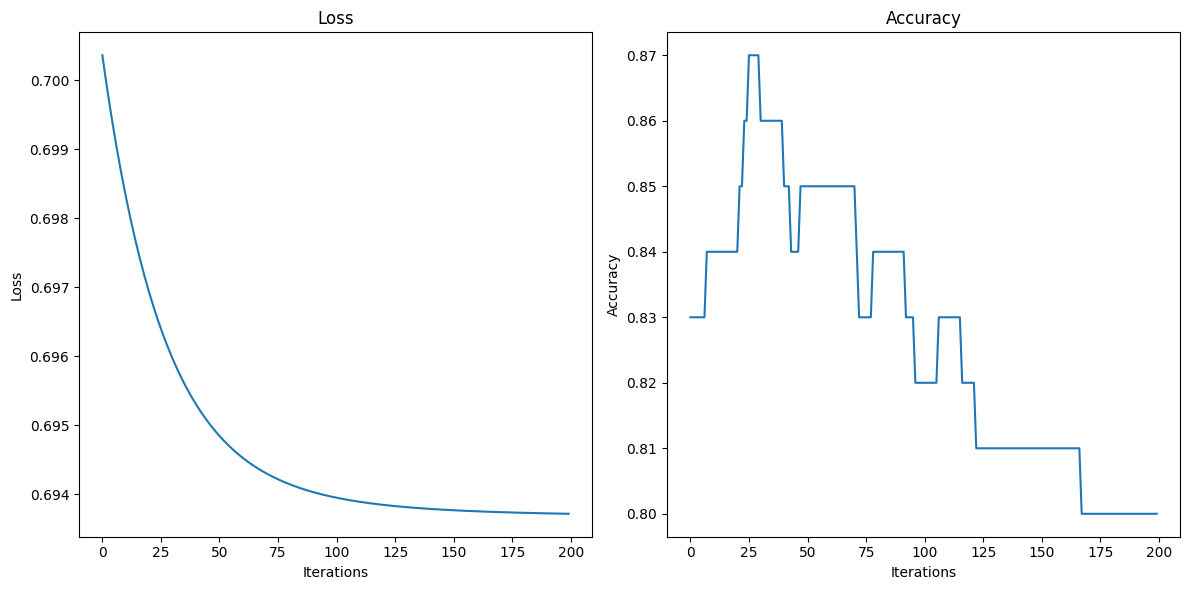

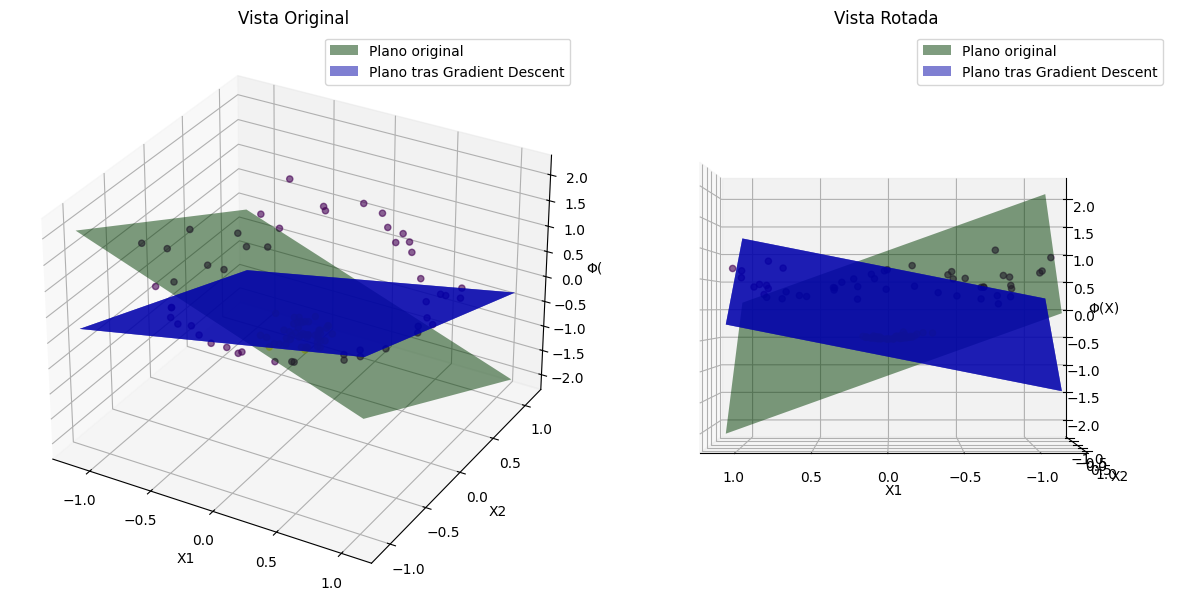

In [31]:
# Gradient Descent
lambda_reg = 1.0
n, m = X.shape
learning_rate = 0.01
iterations = 200

w_original = np.random.uniform(-0.5, 0.5, m)
w = np.copy(w_original)
losses2 = []
accuracies2 = []

for _ in range(iterations):
    gradient = np.mean((-y * X) / (1 + np.exp(-np.dot(y.T, np.dot(X, w))))) + 2*lambda_reg*w
    
    predictions = np.sign(np.dot(X, w))
    accuracy = np.mean(predictions == y.flatten())
    accuracies2.append(accuracy)
    log_loss = np.mean(np.log(1 + np.exp(-y * np.dot(X, w))))
    losses2.append(log_loss)
    
    w -= learning_rate * gradient
    
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 fila, 2 columnas

# Gráfica de Loss
ax[0].plot(range(iterations), losses2)
ax[0].set_title('Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

# Gráfica de Accuracy
ax[1].plot(range(iterations), accuracies2)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()


# Nuevamente, w es perpendicular al plano que separa las dos clases. La recta que separa ambas clases es la función de decisión f(X) = w*X
# La función de decisión es f(X) = w*X = 0
# Para graficar el plano, despejamos x_3 de la ecuación w*X = 0, obteniendo x_3 = -w_1*x_1 - w_2*x_2 / w_3
# Cojo dos puntos para graficar el plano

# w tras gradient descent
x1 = np.array([min(X[:,0]), max(X[:,0])]) 
x2 = np.array([min(X[:,1]), max(X[:,1])])
x1, x2 = np.meshgrid(x1, x2)
x3 = (-w[0] * x1 - w[1] * x2) / w[2]

# w original
x4 = np.array([min(X[:,0]), max(X[:,0])]) 
x5 = np.array([min(X[:,1]), max(X[:,1])])
x4, x5 = np.meshgrid(x1, x2)
x6 = (-w_original[0] * x4 - w_original[1] * x5) / w_original[2]

fig = plt.figure(figsize=(12, 6))

# Primer gráfico (vista original)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', alpha=0.6)  # Alpha ajustado para mayor claridad
plane1 = ax1.plot_surface(x1, x2, x3, color='green', alpha=0.5, label='Plano tras Gradient Descent')
plane2 = ax1.plot_surface(x4, x5, x6, color='blue', alpha=0.5, label='Plano original')
ax1.set_title('Vista Original')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Φ(X)')

# Leyenda manual para los planos
ax1.legend([plane1, plane2], ['Plano original', 'Plano tras Gradient Descent'])

# Segundo gráfico (vista rotada)
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', alpha=0.6)  # Alpha ajustado para mayor claridad
ax2.plot_surface(x1, x2, x3, color='green', alpha=0.5)
ax2.plot_surface(x4, x5, x6, color='blue', alpha=0.5)
ax2.view_init(elev=0, azim=90)  # Cambia los ángulos de elevación y azimut
ax2.set_title('Vista Rotada')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Φ(X)')

# Leyenda manual para los planos
ax2.legend([plane1, plane2], ['Plano original', 'Plano tras Gradient Descent'])

# Mostrar la figura
plt.tight_layout()
plt.show()

## Parte 3

### Apartado (a)

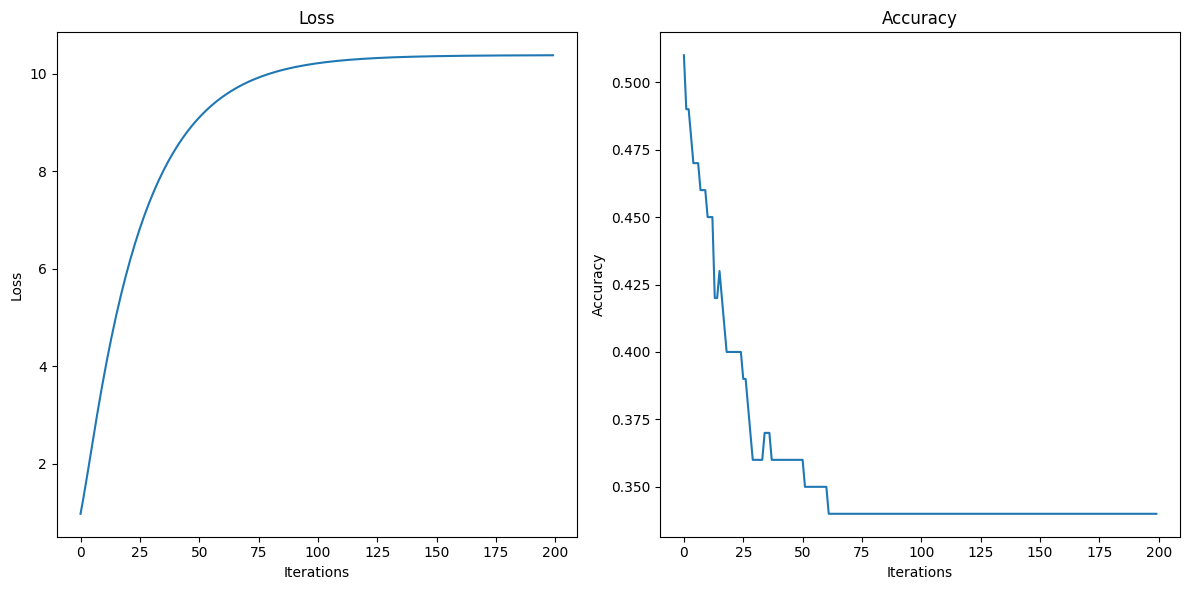

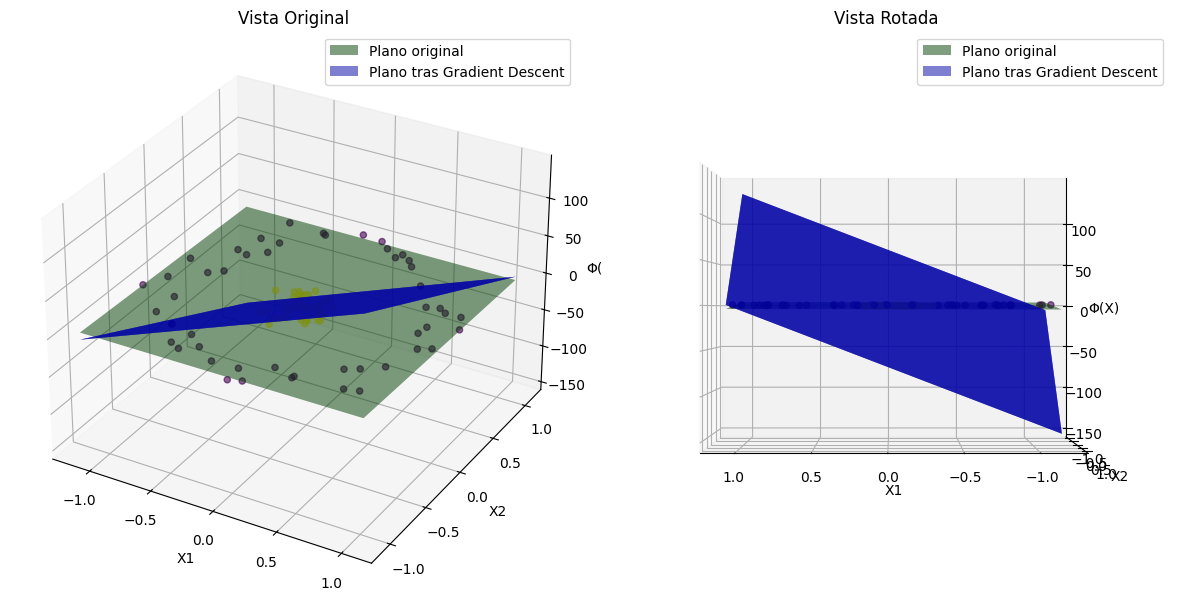

In [145]:
# Repeat the gradient descent approach, but this time optimize over the values c

# Gradient Descent
lambda_reg = 1.0
n, m = X.shape
learning_rate = 0.01
iterations = 200

c = np.random.uniform(0, 1, (n, 1))
w_original = np.dot(X.T, c)

losses3 = []
accuracies3 = []

for _ in range(iterations):
    f_t = np.dot(np.dot(X, X.T), c).T
    gradient = np.mean((-y / (1 + np.exp(np.dot(y, f_t)))) + 2*lambda_reg*c)    
    c -= learning_rate * gradient
    
    # no sería necesario calcular las w en cada iteración, pero lo hago para poder calcular el loss y accuracy
    w = np.dot(X.T, c)
    predictions = np.sign(np.dot(X, w))
    accuracy = np.mean(predictions == y)    
    accuracies3.append(accuracy)
    log_loss = np.mean(np.log(1 + np.exp(np.dot(-y.T, np.dot(X, w)))))
    losses3.append(log_loss)
    
fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
ax[0].plot(range(iterations), losses3)
ax[0].set_title('Loss')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')
ax[1].plot(range(iterations), accuracies3)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Accuracy')
plt.tight_layout()
plt.show()


x1 = np.array([min(X[:,0]), max(X[:,0])])
x2 = np.array([min(X[:,1]), max(X[:,1])])
x1, x2 = np.meshgrid(x1, x2)
x3 = (-w[0] * x1 - w[1] * x2) / w[2]
x4 = np.array([min(X[:,0]), max(X[:,0])])
x5 = np.array([min(X[:,1]), max(X[:,1])])
x4, x5 = np.meshgrid(x1, x2)
x6 = (-w_original[0] * x4 - w_original[1] * x5) / w_original[2]

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', alpha=0.6)
plane1 = ax1.plot_surface(x1, x2, x3, color='green', alpha=0.5, label='Plano tras Gradient Descent')
plane2 = ax1.plot_surface(x4, x5, x6, color='blue', alpha=0.5, label='Plano original')
ax1.set_title('Vista Original')
ax1.set_xlabel('X1')
ax1.set_ylabel('X2')
ax1.set_zlabel('Φ(X)')
ax1.legend([plane1, plane2], ['Plano original', 'Plano tras Gradient Descent'])
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', alpha=0.6)
ax2.plot_surface(x1, x2, x3, color='green', alpha=0.5)
ax2.plot_surface(x4, x5, x6, color='blue', alpha=0.5)
ax2.view_init(elev=0, azim=90)
ax2.set_title('Vista Rotada')
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('Φ(X)')
ax2.legend([plane1, plane2], ['Plano original', 'Plano tras Gradient Descent'])
plt.tight_layout()
plt.show()

### Apartado (b)